In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [33]:
cdfx = pd.read_csv("./catapult_spmv_latency.csv", index_col=0)
vdfx = pd.read_csv("./catapult_spmv_area.csv", index_col=0)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
vdfx['ff_inv'] = 1/vdfx['ff']
cdfx['lut_inv'] = 1/cdfx['lut']
vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = cdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = cdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
cdfx['mem_partition_size1'] = cdfx['knob_array_part1']
vdfx['mem_partition_size1'] = vdfx['knob_array_part1']
cdfx['mem_partition_size2'] = cdfx['knob_array_part2']
vdfx['mem_partition_size2'] = vdfx['knob_array_part2']
# drop columns
cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['knob_array_part1'])
cdfx = cdfx.drop(columns=['knob_array_part2'])

vdfx = vdfx.drop(columns=['knob_I_B'])
vdfx = vdfx.drop(columns=['knob_array_part1'])
vdfx = vdfx.drop(columns=['knob_array_part2'])


In [34]:
print(cdfx.count())
cdfx.head()

knob_UNROLL_F          2863
knob_outer_unroll      2863
knob_inner_unroll1     2863
knob_inner_unroll2     2863
obj1                   2863
obj2                   2863
lut                    2863
ff                     2863
dsp                    2863
bram                   2863
throughput             2863
ff_inv                 2863
lut_inv                2863
1/obj2                 2863
clbUtil                2863
mem_partition_size1    2863
mem_partition_size2    2863
dtype: int64


,knob_UNROLL_F,knob_outer_unroll,knob_inner_unroll1,knob_inner_unroll2,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil,mem_partition_size1,mem_partition_size2
n,,,,,,,,,,,,,,,,,
1,2,1,1,1,0.000147,113,572,434,1,0,0.204082,0.002304,0.001748,0.805310,0.000765,512,2
2,2,1,1,1,0.000175,178,755,444,1,0,0.171429,0.002252,0.001325,0.511236,0.001204,512,4
3,2,1,1,1,0.000171,171,739,444,1,0,0.175439,0.002252,0.001353,0.532164,0.001157,512,8
4,2,1,1,1,0.000226,236,1014,460,1,0,0.132743,0.002174,0.000986,0.385593,0.001597,512,16
5,2,1,1,1,0.000204,262,1014,460,1,0,0.147059,0.002174,0.000986,0.347328,0.001773,512,32


In [35]:
print(vdfx.count())
vdfx.head()

knob_UNROLL_F          2880
knob_outer_unroll      2880
knob_inner_unroll1     2880
knob_inner_unroll2     2880
obj1                   2880
obj2                   2880
lut                    2880
ff                     2880
dsp                    2880
bram                   2880
throughput             2880
ff_inv                 2880
lut_inv                2880
1/obj2                 2880
clbUtil                2880
mem_partition_size1    2880
mem_partition_size2    2880
dtype: int64


,knob_UNROLL_F,knob_outer_unroll,knob_inner_unroll1,knob_inner_unroll2,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil,mem_partition_size1,mem_partition_size2
n,,,,,,,,,,,,,,,,,
0,2,1,1,1,0.000146,119,572,434,1,0,0.205479,0.002304,0.001748,0.764706,0.000805,512,1
1,2,1,1,1,0.000147,113,572,434,1,0,0.204082,0.002304,0.001748,0.805310,0.000765,512,2
2,2,1,1,1,0.000175,178,755,444,1,0,0.171429,0.002252,0.001325,0.511236,0.001204,256,1
3,2,1,1,1,0.000171,171,739,444,1,0,0.175439,0.002252,0.001353,0.532164,0.001157,256,2
4,2,1,1,1,0.000226,236,1014,460,1,0,0.132743,0.002174,0.000986,0.385593,0.001597,128,1


Text(0.5, 1.0, 'Catapult SPMV Area and Latency Design Spaces')

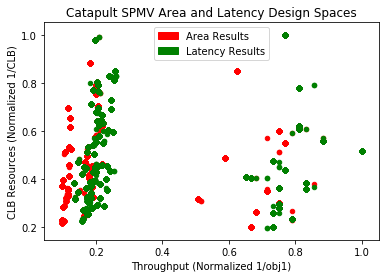

In [36]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Area Results')
green_data = mpatches.Patch(color='green', label='Latency Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title("Catapult SPMV Area and Latency Design Spaces")

Text(0.5, 1.0, 'Latency Optimized Designs')

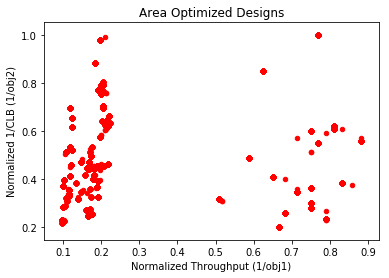

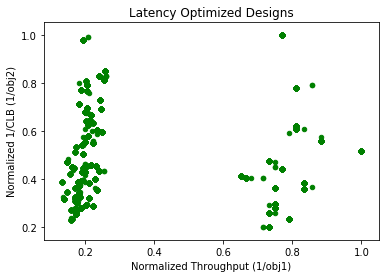

In [37]:
ax1 = vdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='r')
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.title("Area Optimized Designs")

ax = cdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='g')
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.title("Latency Optimized Designs")

In [38]:
print("~~~~~~~~~~~ Latency Opt Averages ~~~~~~~~~~~~\n")
print(cdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Area Opt Averages ~~~~~~~~~~~~\n")
print(vdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Latency Opt Averages ~~~~~~~~~~~~

knob_UNROLL_F             5.818372
knob_outer_unroll         1.901153
knob_inner_unroll1        2.503318
knob_inner_unroll2        2.477471
obj1                      0.000125
obj2                    216.090814
lut                    1089.205728
ff                      373.211317
dsp                       1.876004
bram                      0.000000
throughput                0.345277
ff_inv                    0.002760
lut_inv                   0.001054
1/obj2                    0.487194
clbUtil                   0.001462
mem_partition_size1     244.185819
mem_partition_size2      10.524974
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Area Opt Averages ~~~~~~~~~~~~

knob_UNROLL_F            16.000000
knob_outer_unroll         2.000000
knob_inner_unroll1        2.500000
knob_inner_unroll2        2.500000
obj1                      0.000160
obj2                    216.150694
lut                    1072.144097
ff        

In [40]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['knob_UNROLL_F', 'knob_outer_unroll', 'knob_inner_unroll1', 'knob_inner_unroll2'], how='inner')
cv_df.count()

knob_UNROLL_F            27537
knob_outer_unroll        27537
knob_inner_unroll1       27537
knob_inner_unroll2       27537
obj1_x                   27537
obj2_x                   27537
lut_x                    27537
ff_x                     27537
dsp_x                    27537
bram_x                   27537
throughput_x             27537
ff_inv_x                 27537
lut_inv_x                27537
1/obj2_x                 27537
clbUtil_x                27537
mem_partition_size1_x    27537
mem_partition_size2_x    27537
obj1_y                   27537
obj2_y                   27537
lut_y                    27537
ff_y                     27537
dsp_y                    27537
bram_y                   27537
throughput_y             27537
ff_inv_y                 27537
lut_inv_y                27537
1/obj2_y                 27537
clbUtil_y                27537
mem_partition_size1_y    27537
mem_partition_size2_y    27537
dtype: int64

(0, 1)

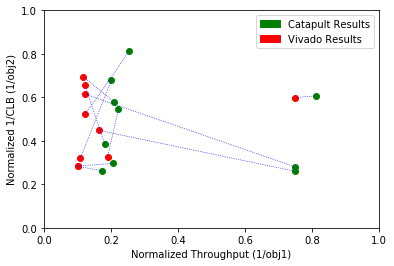

In [41]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 0.003)

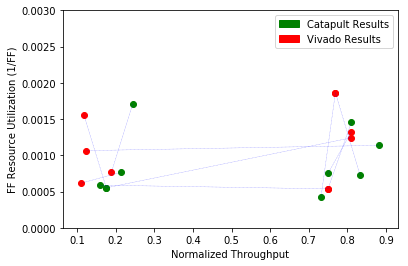

In [42]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('FF Resource Utilization (1/FF)')
plt.ylim(0, 0.003)